Projeto consiste em uma análise da Pesquisa Nacional por Amostra de Domicílios (PNAD) - 2015
Dados obtidos no site da Alura e hospedados no seguinte endereço:
https://raw.githubusercontent.com/matheusfsanna/estatistica_com_R/main/dados.csv


Importando bibliotecas

In [178]:
library(dplyr)
library(ggplot2)

# Importando o arquivos dados.csv e visualizando os 6 primeiros registros

In [226]:
patch = '/kaggle/input/dados-projeto-alura/dados.csv'
dados = read.csv(patch)
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


Classes de renda:

A ► Acima de 25 SM

B ► De 15 a 25 SM

C ► De 5 a 15 SM

D ► De 2 a 5 SM

E ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de R$ 788,00.

# Análise da Renda

É valido ressaltar que o salário mínimo da época era de 788,00 reais

Criando faixas de classes

In [281]:
salario_minimo = 788
classes <- c(
    min(dados$Renda),
    2 * salario_minimo,
    5 * salario_minimo,
    15 * salario_minimo,
    25 * salario_minimo,
    max(dados$Renda)
)
classes

[1]      0   1576   3940  11820  19700 200000

Criando rótulos para as rendas

In [282]:
labels <- c('E', 'D', 'C', 'B', 'A')

Aplicando a frequência a renda

In [231]:
frequencia <- table(
    cut(
        x = dados$Renda, 
        breaks = classes, 
        labels = labels, 
        include.lowest = TRUE
    )
)
frequencia



    E     D     C     B     A 
49755 18602  7241   822   420 

Convertendo para porcentagem

In [284]:
percentual <- prop.table(frequencia) * 100
dist_freq_renda <- cbind('Frequência' = frequencia, 'Porcentagem (%)' = percentual)


,Indígena,Branca,Preta,Amarela,Parda,Indígena,Branca,Preta,Amarela,Parda
Masculino,256,22194,5502,235,25063,0.3331598,28.88339,7.160333,0.3058303,32.61713
Feminino,101,9621,2889,117,10862,0.1314420,12.52082,3.759761,0.1522644,14.13587


Maioria de quem respondeu ao Censo foram homens devido ao fato deles serem vistos como "chefes de família" nesse contexto.

Convertendo em dataframe por fins estéticos

In [293]:
bar_chart <- data.frame(dist_freq_renda)
bar_chart


,Indígena,Branca,Preta,Amarela,Parda,Indígena.1,Branca.1,Preta.1,Amarela.1,Parda.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Masculino,256,22194,5502,235,25063,0.3331598,28.88339,7.160333,0.3058303,32.61713
Feminino,101,9621,2889,117,10862,0.1314420,12.52082,3.759761,0.1522644,14.13587


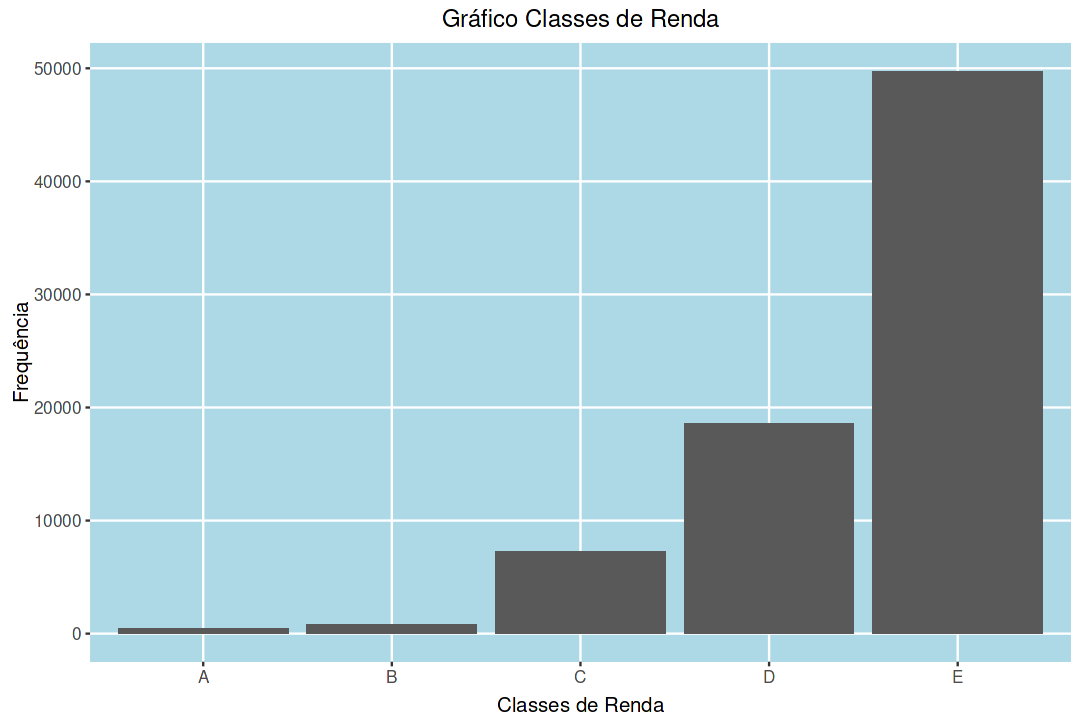

In [277]:
# Criando o gráfico com a média adicionada
ggplot(bar_chart, aes(x = row.names(bar_chart), y = Frequência)) + 
  geom_bar(stat = "identity") + 
  ylab("Frequência") + 
  xlab("Classes de Renda") + 
  ggtitle('Gráfico Classes de Renda') +
  formatos


Ampla maioria da população é das classe E e pouquíssimos são da classe A e B evidenciando uma péssima distribuição de renda sendo ela agrupada entre poucos

# Analisando as idades

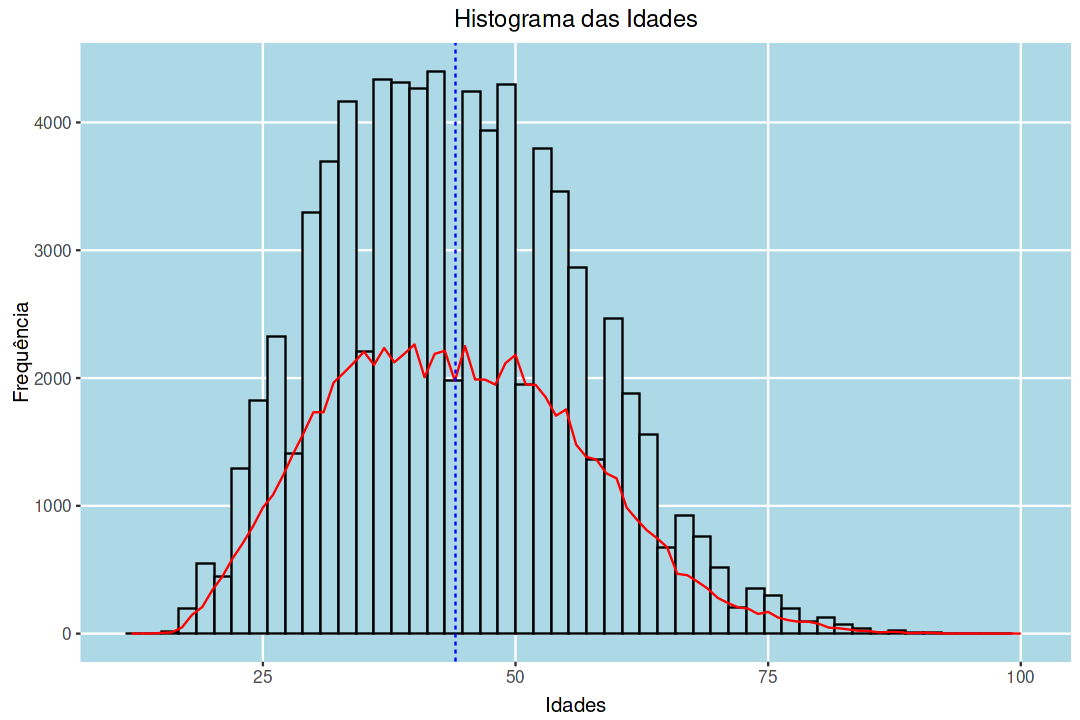

In [238]:
# Calculando a média
media <- mean(dados$Idade)

# Criando o histograma com linhas de frequência entre as barras e uma linha para a média
ggplot(dados, aes(x = Idade)) + 
  geom_histogram(bins = 50, fill = "lightblue", color = "black") +
  geom_freqpoly(aes(group = 1), binwidth = 1, color = "red") +  # Adicionando linhas de frequência
  geom_vline(xintercept = media, linetype = "dashed", color = "blue") +  # Adicionando linha para média
  ylab("Frequência") + 
  xlab("Idades") + 
  ggtitle('Histograma das Idades') +
  formatos


In [279]:
library(dplyr)

# Definindo as faixas de idade
faixas_idade <- c(0, 20, 30, 40, 50, 60, Inf)
nomes_faixas <- c("0-20", "21-30", "31-40", "41-50", "51-60", "61+")

# Criando uma nova variável de faixa de idade no dataframe
dados <- dados %>%
  mutate(Faixa_Idade = cut(Idade, breaks = faixas_idade, labels = nomes_faixas, include.lowest = TRUE))

# Calculando a soma da renda por faixa de idade
renda_por_faixa <- dados %>%
  group_by(Faixa_Idade) %>%
  summarise(Soma_Renda = sum(Renda))

# Calculando a porcentagem de renda por faixa de idade
renda_por_faixa <- renda_por_faixa %>%
  mutate(Percent_Renda = (Soma_Renda / sum(Soma_Renda)) * 100)

# Exibindo o resultado
print(renda_por_faixa)


# A tibble: 6 × 3
  Faixa_Idade Soma_Renda Percent_Renda
  <fct>            <int>         <dbl>
1 0-20            752806         0.490
2 21-30         16313022        10.6  
3 31-40         41893645        27.3  
4 41-50         45056466        29.3  
5 51-60         34798368        22.6  
6 61+           14895138         9.69 


É notório que de 31 aos 60 é o intervalo onde as pessoas possuem maior renda no Brasil, segundo o levantamento, sendo o percentual da renda que fica na mão deles de entorno de 78%

Plotando a distribuição de idades

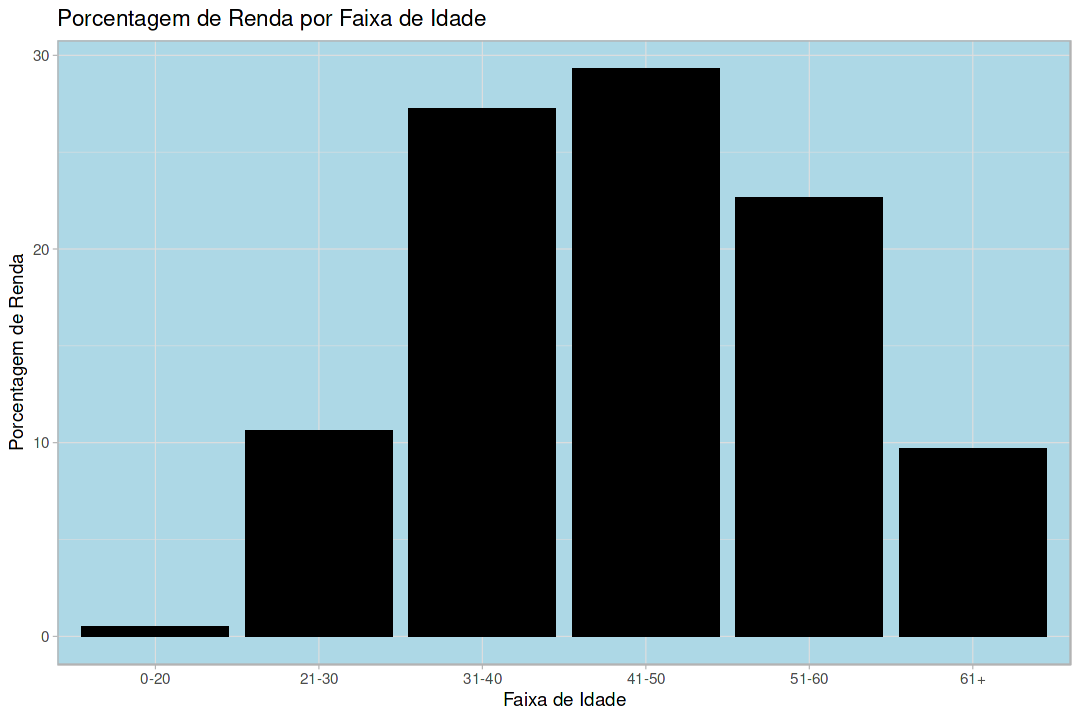

In [280]:
ggplot(renda_por_faixa, aes(x = Faixa_Idade, y = Percent_Renda)) +
  geom_bar(stat = "identity", fill = "black") +
  ylab("Porcentagem de Renda") +
  xlab("Faixa de Idade") +
  ggtitle("Porcentagem de Renda por Faixa de Idade") +
  theme_light() +
  theme(panel.background = element_rect(fill = "lightblue"))

In [294]:
mean(dados$Idade)

[1] 44.07142

Existe um grande agrupamento de dados entre 41 e 50 anos, sendo a média do dataset de 44 anos. É válido notar que entre 0 e 20 anos são pouquíssimos elementos se comparado a qualquer outra faixa de idades apresentada

# Analisando a altura

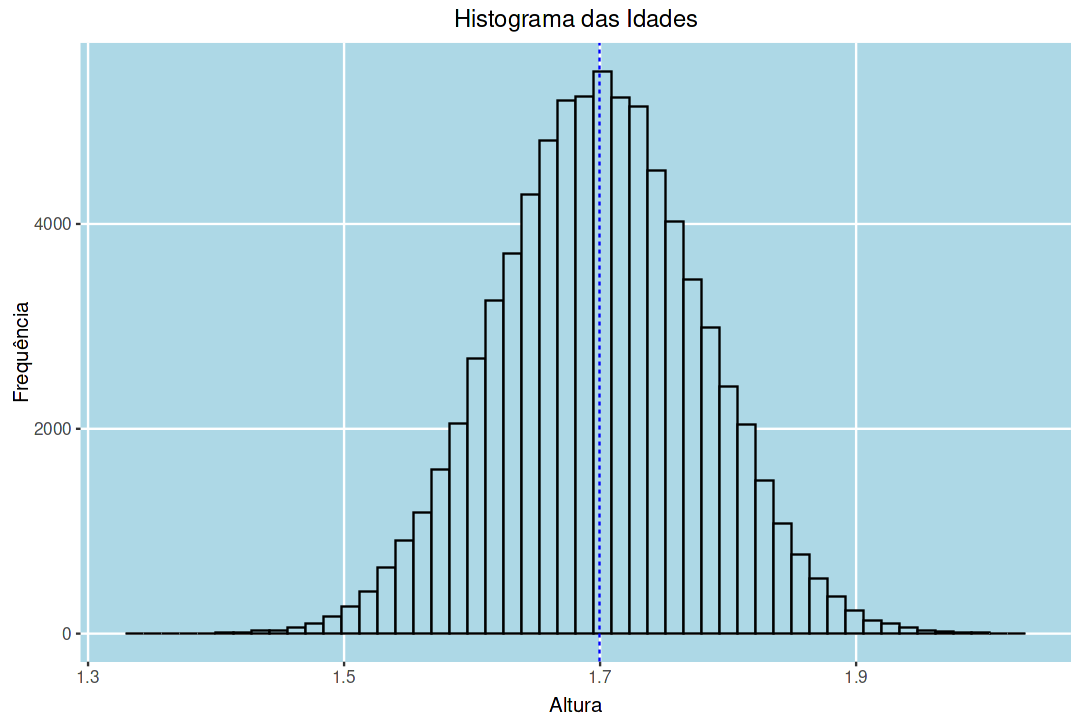

In [239]:
# Calculando a média
media <- mean(dados$Altura)

# Criando o histograma com linhas de frequência entre as barras e uma linha para a média
ggplot(dados, aes(x = Altura)) + 
  geom_histogram(bins = 50, fill = "lightblue", color = "black") +
  #geom_freqpoly(aes(group = 1), binwidth = 1, color = "red") +  # Adicionando linhas de frequência
  geom_vline(xintercept = media, linetype = "dashed", color = "blue") +  # Adicionando linha para média
  ylab("Frequência") + 
  xlab("Altura") +  
  ggtitle('Histograma das Idades') +
  formatos

É interessante como os dados de altura são praticamente em formato de sino(distribuição gaussiana)

Análise de Renda

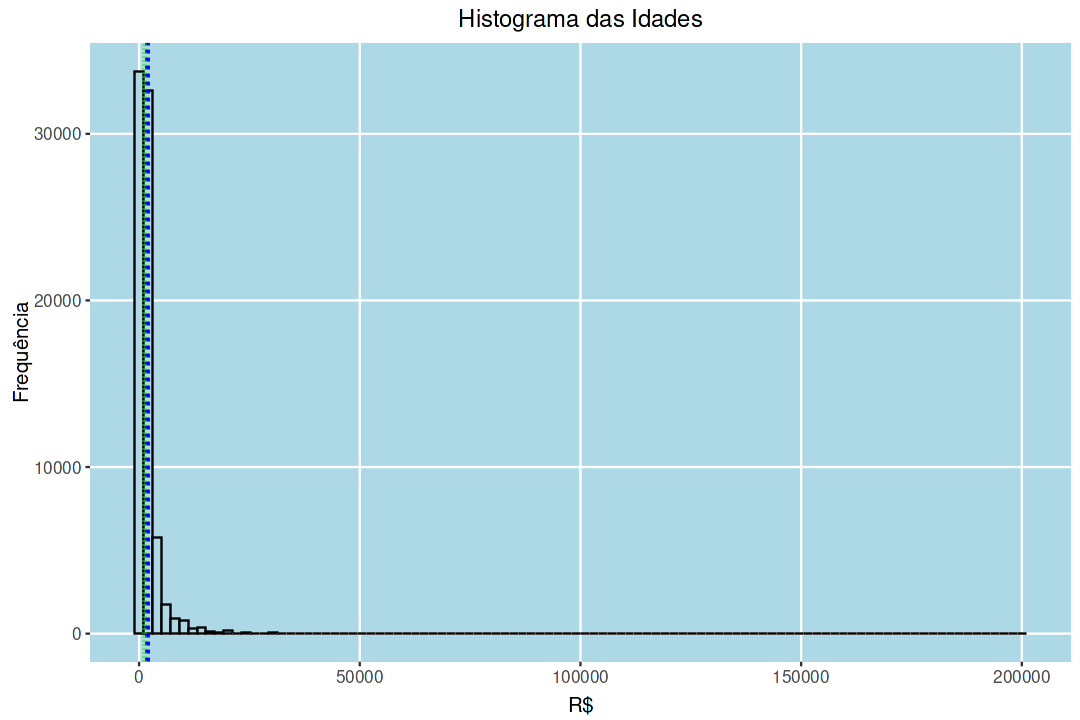

In [297]:
media = mean(dados$Renda)
mediana = median(dados$Renda)

ggplot(dados, aes(x = Renda)) + 
  geom_histogram(bins = 100, fill = "lightblue", color = "black") +
  geom_vline(xintercept = mean(dados$Renda), linetype = "dashed", color = "blue", linewidth = 1) +  # Adicionando linha para média
  geom_vline(xintercept = mediana, linetype = "dotted", color = "green", linewidth = 1) +  # Adicionando linha para mediana
  ylab("Frequência") + 
  xlab("R$") + 
  ggtitle('Histograma das Idades') +
  formatos

Novamente é demonstrado que a renda se acumula na mão de pouquíssimos, a seguir excluí (arbritraliamente) os dados de quem recebe 20000 ou mais 

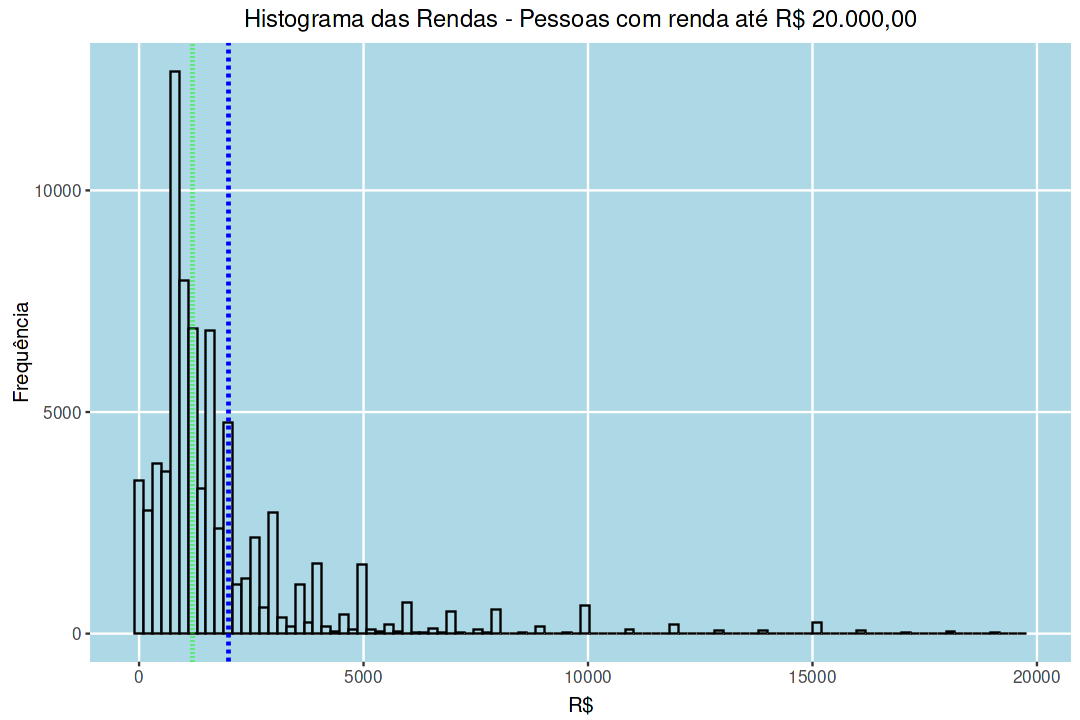

In [298]:
ggplot(dados[dados$Renda < 20000, ], aes(x = Renda)) + 
    geom_histogram(bins = 100, fill = "lightblue", color = "black") +
    geom_vline(xintercept = mean(dados$Renda), linetype = "dashed", color = "blue", linewidth = 1) +  # Adicionando linha para média
    geom_vline(xintercept = mediana, linetype = "dotted", color = "green", linewidth = 1) +  # Adicionando linha para mediana
    ylab("Frequência") + 
    xlab("R$") + 
    ggtitle('Histograma das Rendas - Pessoas com renda até R$ 20.000,00') +
    formatos

Excluindo os dados de quem recebe mais que 20 mil o gráfico fica mais esparçado sendo possível ver melhor as outras faixas de renda e a mediana se desloca significativamente para direita mostrando que a distruição fica menos desigual

# Analisando 'Sexo', 'Cor' e 'Anos de Estudo'

In [299]:
sexo = c(
    'Masculino', 
    'Feminino'
)
cor = c(
    'Indígena', 
    'Branca', 
    'Preta', 
    'Amarela', 
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano', 
    '1 ano', 
    '2 anos', 
    '3 anos', 
    '4 anos', 
    '5 anos', 
    '6 anos', 
    '7 anos', 
    '8 anos', 
    '9 anos', 
    '10 anos', 
    '11 anos', 
    '12 anos', 
    '13 anos', 
    '14 anos', 
    '15 anos ou mais', 
    'Não determinados'
)

In [301]:
# Sexo
dados$Cat.Sexo <- factor(dados$Sexo)
levels(dados$Cat.Sexo) <- sexo

# Cor
dados$Cat.Cor <- factor(dados$Cor)
levels(dados$Cat.Cor) <- cor

# Anos de Estudo
dados$Cat.Anos.de.Estudo <- factor(dados$Anos.de.Estudo, order = TRUE)
levels(dados$Cat.Anos.de.Estudo) <- anos_de_estudo


In [302]:
frequencia <- table(dados$Cat.Sexo, dados$Cat.Cor)
frequencia <- cbind(frequencia)
frequencia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [303]:
percentual <- cbind(prop.table(frequencia) * 100)
percentual

,Indígena,Branca,Preta,Amarela,Parda
Masculino,0.3331598,28.88339,7.160333,0.3058303,32.61713
Feminino,0.1314420,12.52082,3.759761,0.1522644,14.13587


A maior parte de quem respondeu à pesquisa se considera pardo sendo seguido proximamente por brancos, sendo maioria nos dois casos respostas de pessoas de gênero masculino

In [304]:
Moda <- function(x) {
    frequencias <- table(x) 
    return(names(frequencias)[frequencias == max(frequencias)])
}
as.numeric(Moda(dados$Renda))

[1] 788

In [305]:
var(dados$Renda)

[1] 11044906

In [306]:
sd(dados$Renda)

[1] 3323.388

In [307]:
summary(dados$Renda)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     788    1200    2000    2000  200000 

In [308]:
medias <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), mean)
medias

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


Algo curioso nessa tabela é notar que a renda das mulheres indígenas é superior aos homens indígenas em quase duas vezes, rompendo com a tendência demonstrada pelas outras análises

In [309]:
medianas <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), median)
medianas

,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


Excluindo valores atípicos (outliners) a renda feminina e masculina ficam bem mais próximas no caso dos povos indígenas.

In [310]:
maximos <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), max)
maximos

,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


Pausado dia 16/03 para futura análise 

In [252]:
variancia <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), var)
variancia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


In [311]:
desvio_padrao <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), sd)
desvio_padrao

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


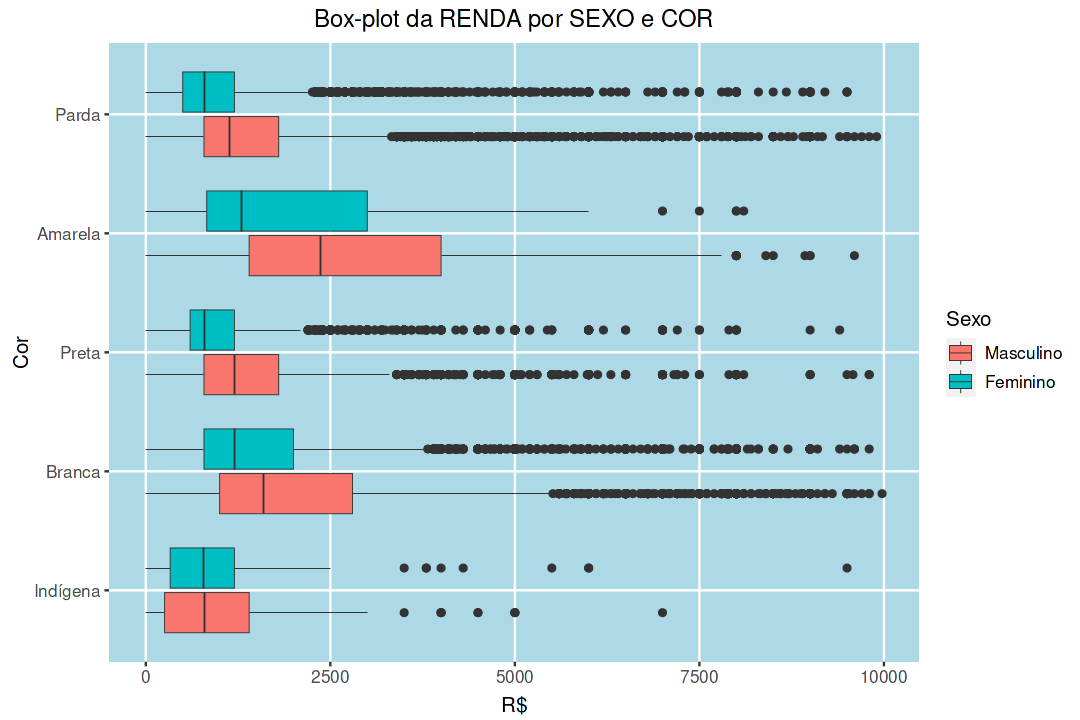

In [312]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) + 
    geom_boxplot(size = 0.2) + 
    coord_flip() +
    ylab("R$") + 
    xlab("Cor") + 
    guides(fill = guide_legend(title = 'Sexo')) +
    ggtitle('Box-plot da RENDA por SEXO e COR') +
    formatos

In [313]:
length(dados$Renda[dados$Renda <= 788]) / length(dados$Renda) * 100

[1] 28.86778

In [314]:
quantile(dados$Renda, .99)

99% 
15000

In [315]:
medias <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), mean)
medias

,Masculino,Feminino
Sem instrução e menos de 1 ano,799.4946,516.2017
1 ano,895.6290,492.7720
2 anos,931.1790,529.9116
3 anos,1109.2039,546.8539
4 anos,1302.3293,704.2791
5 anos,1338.6532,781.3898
6 anos,1448.8754,833.7328
7 anos,1465.4979,830.7510
8 anos,1639.3967,933.6154
9 anos,1508.0389,868.0217


In [316]:
medianas <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), median)
medianas

,Masculino,Feminino
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800
9 anos,1200,788


In [317]:
maximos <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), max)
maximos

,Masculino,Feminino
Sem instrução e menos de 1 ano,30000,10000
1 ano,30000,2000
2 anos,40000,4000
3 anos,80000,3500
4 anos,50000,10000
5 anos,35000,8000
6 anos,25000,6000
7 anos,40000,9000
8 anos,30000,18000
9 anos,60000,20000


In [318]:
desvio_padrao <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), sd)
desvio_padrao

,Masculino,Feminino
Sem instrução e menos de 1 ano,1023.9049,639.3115
1 ano,1331.9506,425.2918
2 anos,1435.1738,498.2342
3 anos,2143.8001,424.1244
4 anos,1419.8218,629.5534
5 anos,1484.6506,635.7826
6 anos,1476.6286,574.5470
7 anos,1419.7087,602.0380
8 anos,1515.5837,896.7812
9 anos,2137.6648,973.2217


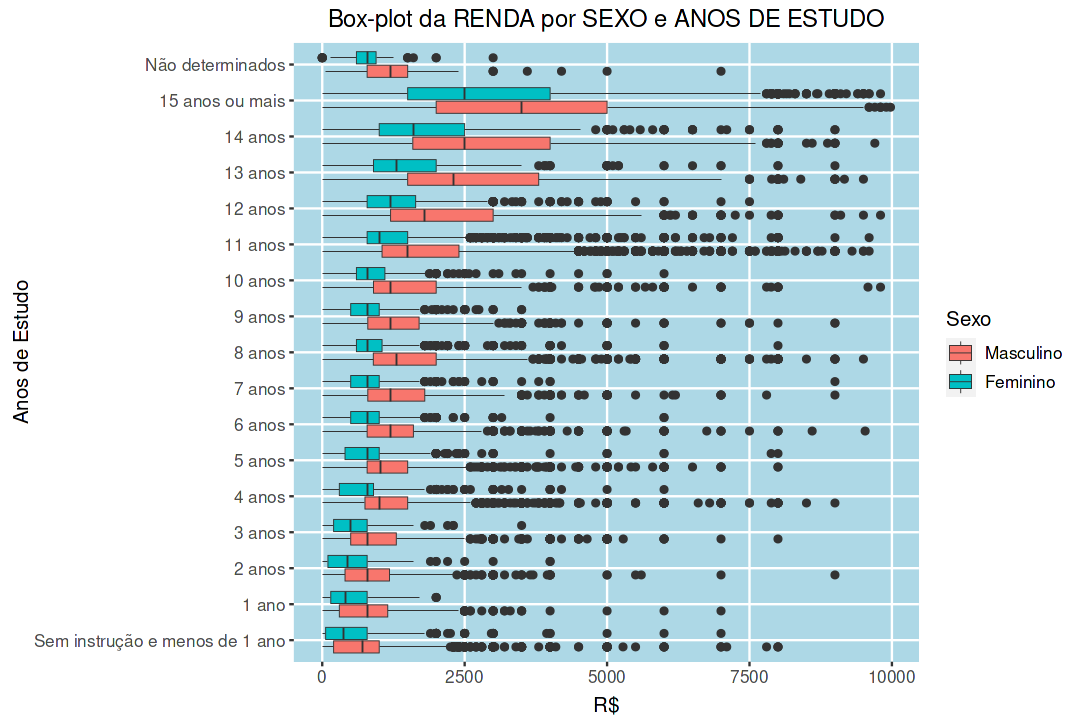

In [319]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Anos.de.Estudo, y = Renda, fill = Cat.Sexo)) + 
    geom_boxplot(size = 0.2) + 
    coord_flip() +
    ylab("R$") + 
    xlab("Anos de Estudo") + 
    guides(fill = guide_legend(title = 'Sexo')) +
    ggtitle('Box-plot da RENDA por SEXO e ANOS DE ESTUDO') +
    formatos